PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

# Práctica 1

## Introducción

Esta es la primera práctica del segundo laboratorio. Dada una base de datos en formato .csv, se nos pide constestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos junto a las librerías necesarias: 

In [1]:
#Importar librerías
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler 
from math import sqrt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

#Importamos la base de datos
data = pd.read_csv('olimpiadas.csv',sep=',')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Gracias a la función data.info(), se observa que se está trabajando con un total de 271116 observaciones, mientras que con data.head() se visualiza la forma que tiene la base de datos y las primeras filas de esta. 

Según se ha estudiado, destacamos dos métodos para afrontar un proyecto, KDD (Knowledge Discovery in Databases) y CRIPS-DM (Cross-Industry Standard Process for Data Mining). En este caso, para enfrentarlo, se utilizará CRISP-DM, ya que consiste en un método menos acádemico, y se considera que es el más apropiado para esta práctica. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

Comprensión de los datos: recopilación inicial, descripción y exploración de datos.

Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

Modelado: aplicar las técnicas de minería de datos a los dataset.

Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action.

## Comprensión de los negocios y definición del problema

Se quiere crear un modelo que permita saber si un atleta español va a tener medalla de oro, plata o bronce
en los juegos olímpicos de Tokio que se celebrarán en 2020. Para ello, tendremos en cuenta el lugar que
ocupan en un espacio n-dimensional donde n es el número de características de cada atleta.
Para ello usaremos el dataset “Juegos olímpicos” que se encuentra en Moodle. Elige el clasificador que más se
adapte de entre los vistos en clase y usa scikit-learn junto con las librerías que necesites para resolver las
siguientes cuestiones.


1) Haz todo el preprocesamiento para crear un set de entrenamiento y otro de validación qué permita
clasificar atletas qué tengan sólo las características necesarias. Aparte de los totalmente necesarios,
usaremos como atributos: Sexo, Edad, Altura y Peso. Explica qué has hecho y porqué. 


2) Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde
al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir
la cercanía de esa nueva instancia con el resto.


3) Elige la mejor configuración entre las anteriores. Para ello dibuja una tabla ver cómo evoluciona la
clasificación. Dibuja los resultados que se obtienen con ambas configuraciones elegidas cómo las
mejores. 


4) Utiliza el clasificador para saber que medalla es más probable que ganen Bruno Hortelano (Athletycs),
Carolina Marín (Badminton) o la selección femenina de baloncesto (Basketball).



## Comprensión de los datos

Según se ha visto anteriormente, la base de datos consta de 271116 observaciones, y 15 atributos, pero no deseamos trabajar con todos, ya que seguramente encontremos datos que no aportan información nueva, para ello se va a proceder a definir cada uno para así ver cuáles son los esenciales:
- ID: identificación del atleta
- Name: nombre del atleta
- Sex: sexo del atleta
- Age: edad del atleta 
- Height: altura del atleta
- Weight: peso del atleta
- NOC: National Olympic Committee (Comité Olímpico Nacional) 
- Games: el nombre de los Juegos Olímpicos en los que el atleta participó
- Year: es el año en el que se celebraron los Juegos Olímpicos en los que el atleta participó
- Season: indica si los Juegos Olímpicos se celebraron en verano o en invierno.
- City: es el nombre de la ciudad en la que se celebraron los Juegos Olímpicos en los que el atleta participó.
- Sport: es el deporte en el que participó el atleta.
- Event: es el nombre específico del evento en el que participó el atleta
- Medal: indica la medalla que ganó el atleta en el evento en el que participó.


## Preparación de los datos

Primero se va a proceder a seleccionar aquellos atributos que sí que son necesarios. Según criterio, eliminaremos los siguientes: 
- ID: Debido a la existencia de otro atributo llamado 'Name'. La elección de eliminar este procede de que en el último apartado de la práctica, se facilitan una serie de nombres, y se deberá predecir la obtención o no de medalla. 
- Year: Es un atributo irrelevante, ya que en 'Games', se recolecta información acerca de la estación del año en la que se juega, y el año, por lo que de esta manera ahorramos coste computacional. 
- Season: De la misma manera, 'Games' ya aporta información sobre la estación en la que participa el atleta. 
- City: Con saber el año y la estación en la que se jugó, se puede saber la ciudad, por lo que estos datos no aportan información útil y supone un coste computacional adicional. 
- Sport: Esta información ya  se encuentra en 'Event', en la que además se especifica la categoría en la que se juega. 

A continuación, creamos una nueva base de datos llamada 'df' en la que guardaremos la información seleccionada anteriormente: 

In [2]:
df=data[['Name', 'Sport', 'Sex', 'Age', 'Height', 'Weight', 'Games', 'NOC', 'Event', 'Medal']]

In [3]:
#NameNaN = df['Name'].isna().sum()
#print(f"La cantidad de NaN que existen en la variable Name es:{NameNaN}")
SexNaN = df['Sex'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Sex es:{SexNaN}")
AgeNaN = df['Age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Age es:{AgeNaN}")
HeightNaN = df['Height'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Height es:{HeightNaN}")
WeightNaN = df['Weight'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Weight es:{WeightNaN}")
GamesNaN = df['Games'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Games es:{GamesNaN}")
NOCNaN = df['NOC'].isna().sum()
print(f"La cantidad de NaN que existen en la variable NOC es:{NOCNaN}")
EventNaN = df['Event'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Event es:{EventNaN}")
MedalNaN = df['Medal'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Medal es:{MedalNaN}")

La cantidad de NaN que existen en la variable Sex es:0
La cantidad de NaN que existen en la variable Age es:9474
La cantidad de NaN que existen en la variable Height es:60171
La cantidad de NaN que existen en la variable Weight es:62875
La cantidad de NaN que existen en la variable Games es:0
La cantidad de NaN que existen en la variable NOC es:0
La cantidad de NaN que existen en la variable Event es:0
La cantidad de NaN que existen en la variable Medal es:231333


Se observa una gran cantidad de NaN's en las variables que indican la edad, la altura, el peso y la medalla ganada en cuestión.  
Observemos cada uno en detalle para decidir qué hacer con cada atributo: 
- Age: Es información relevante, y como se está evitando eliminar registros, se rellena con la media de las edades. 
- Height: De la misma manera que se ha hecho con la edad, se rellena con la media de las alturas.
- Weight: Igual que anteriormente, se rellena con la media de los pesos. 
- Medal: Es normal encontrar NaN, ya que esto indica todos aquellos atletas que no han obtenido una medalla, por lo que se rellena con 'NoMedal' para evitar futuros problemas. 


In [4]:
# Calcula la media de la columna 'Age'
mediaA = df['Age'].mean()
# Rellena los valores NaN con la media
df['Age'].fillna(mediaA, inplace=True) 
# Calcula la media de la columna 'Height'
mediaH = df['Height'].mean()
# Rellena los valores NaN con la media
df['Height'].fillna(mediaH, inplace=True) 
# Calcula la media de la columna 'Height'
mediaW = df['Weight'].mean()
# Rellena los valores NaN con la media
df['Weight'].fillna(mediaW, inplace=True) 
# Rellena los valores NaN con 'NoMedal'
df['Medal'].fillna('NpMedal', inplace=True) 

<ipython-input-4-0cf37b900bc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(mediaA, inplace=True)
<ipython-input-4-0cf37b900bc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'].fillna(mediaH, inplace=True)
<ipython-input-4-0cf37b900bc3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'].fillna(mediaW, inplace=True)
<ipython-input-4-0cf37b900bc3>:14: SettingWithCopyWarning: 
A value is tryi

Comprobemos por tanto que la suma de los NaN de los atributos: edad, peso y altura es 0, es decir, se ha rellenado de manera correcta: 

In [5]:
df['Height'].isnull().sum() + df['Age'].isnull().sum() + df['Weight'].isnull().sum()

0

Efectivamente, la suma total de los NaN de esos tres atributos es 0, por lo que procedemos con lo siguiente. 

Se procede a representar mediante un boxplot las variables: Edad, Peso y Altura para así observar cuáles son los máximos y mínimos, y tener en cuenta la presencia de outliers para categorizar dichas variables. 

Categorizamos dichos atributos ya que el resto de variables encontradas son categóricas, de esta manera, más adelante, en la selección según distancia se utilizará un criterio visto en clase que es la distancia de Hamming, que es una métrica para distancias para valores categóricos. 

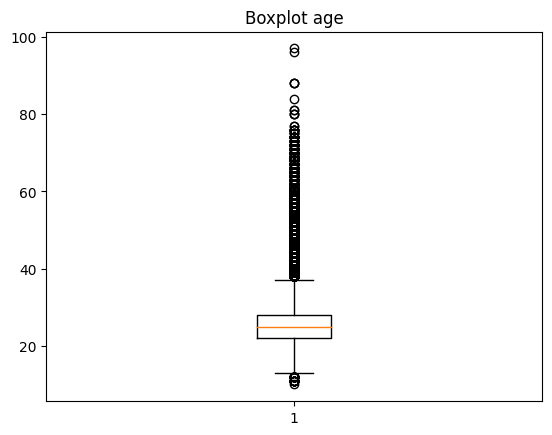

In [6]:
import matplotlib.pyplot as plt
boxplot_age=df['Age']
plt.boxplot(boxplot_age)
plt.title('Boxplot age')
plt.show()

In [7]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_age)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

13.0 37.0 11981


Para las categorías: 

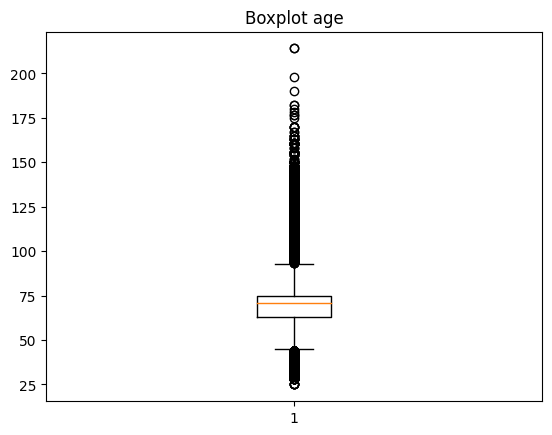

In [8]:
import matplotlib.pyplot as plt
boxplot_weight=df['Weight']
plt.boxplot(boxplot_weight)
plt.title('Boxplot age')
plt.show()

In [9]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_weight)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

45.0 93.0 15574


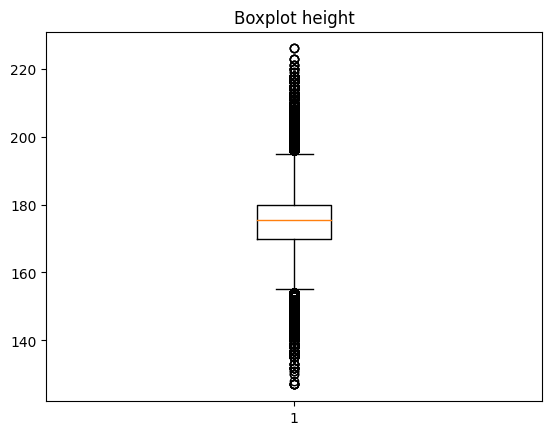

In [10]:
import matplotlib.pyplot as plt
boxplot_height=df['Height']
plt.boxplot(boxplot_height)
plt.title('Boxplot height')
plt.show()

In [11]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_height)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

155.0 195.0 10532


## Ejercicio 2
Prueba con distintas configuraciones de las dos métricas principales. La primera métrica corresponde al número de individuos que usarás para clasificar una nueva instancia y la segunda cómo vas a medir la cercanía de esa nueva instancia con el resto. (

N de individuos: k=1, k=2 y k=3 
métrica: cuando aplicas knn el código te deja poner distintos criterios como distintas distancias, 
- Primero criterio: selección de individuos es decir, si k=1, k=2, k=3  

- Segundo criterio: ¿qué distancia se va a usar? Una va a ser distancia Hammiltoniana 

In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


Importante: se quita games

In [18]:
dataPruebaX=df[['Sex', 'Age', 'Sport', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]


le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(dataPruebaX, dataPruebaY, test_size=0.2, random_state=42)

# Definir distintas configuraciones de k y distancia
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

#Creación de tabla
table = PrettyTable()
table.field_names = ["k", "metric", "accuracy", "error_medio"]

# Evaluar el desempeño del modelo para cada configuración de k y distancia
for k in k_values:
    for metric in distance_metrics:
        # Entrenar el modelo
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        model.fit(X_train, y_train)
        
        # Realizar la predicción en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, y_pred)

        #Error medio 
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)        
        
        # Imprimir la configuración y la precisión del modelo
        table.add_row([k, metric, accuracy, rmse])
        #print('k={}, metric={}, accuracy={}, error_medio={}'.format(k, metric, accuracy, rmse))

print(table)
        

<ipython-input-18-54ad72f750c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-18-54ad72f750c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-18-54ad72f750c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

+---+-----------+--------------------+--------------------+
| k |   metric  |      accuracy      |    error_medio     |
+---+-----------+--------------------+--------------------+
| 3 | euclidean | 0.8267925641782237 | 0.6681373323174172 |
| 3 | manhattan | 0.8321407494836235 | 0.6687305149482096 |
| 3 | minkowski | 0.8267925641782237 | 0.6681373323174172 |
| 5 | euclidean | 0.8458800531130127 | 0.6049338550762465 |
| 5 | manhattan | 0.8491627323694305 | 0.603499311762431  |
| 5 | minkowski | 0.8458800531130127 | 0.6049338550762465 |
| 7 | euclidean | 0.8524269696075538 | 0.5837090782149595 |
| 7 | manhattan | 0.8563551195042786 | 0.5828554014527579 |
| 7 | minkowski | 0.8524269696075538 | 0.5837090782149595 |
+---+-----------+--------------------+--------------------+


In [ ]:
dataPruebaX=df[['Sex', 'Age', 'Sport', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]


for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX = pd.concat([dataPruebaX, pd.get_dummies(dataPruebaX[col], prefix=col)], axis=1)
        dataPruebaX.drop(col, axis=1, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(dataPruebaX, dataPruebaY, test_size=0.3, random_state=42)


# Definir distintas configuraciones de k y distancia
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'hamming']

#Creación de tabla
table = PrettyTable()
table.field_names = ["k", "metric", "accuracy", "error_medio"]

# Evaluar el desempeño del modelo para cada configuración de k y distancia
for k in k_values:
    for metric in distance_metrics:
        # Entrenar el modelo
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        model.fit(X_train, y_train)
        
        # Realizar la predicción en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular la precisión del modelo
        accuracy = accuracy_score(y_test, y_pred)

        #Error medio 
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)        
        
        # Imprimir la configuración y la precisión del modelo
        table.add_row([k, metric, accuracy, rmse])
        #print('k={}, metric={}, accuracy={}, error_medio={}'.format(k, metric, accuracy, rmse))

print(table)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [253]:
# buscar el nombre 'Carolina Marín'
nombre = "Basketball Women's Basketball"
BASKET = df.loc[(df['Event'] == "Basketball Women's Basketball") & (df['Games']== '2008 Summer') & (df['NOC']=='ESP')]
BASKET

,Name,Sport,Sex,Age,Height,Weight,Games,NOC,Event,Medal
167,Tamara Abalde Daz,Basketball,F,19.0,185.0,72.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
2243,"Elisabeth ""Elisa"" Aguilar Lpez",Basketball,F,31.0,172.0,75.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
139184,Cindy Orqudea Lima Garca,Basketball,F,27.0,192.0,78.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
151071,Nuria Martnez Prat,Basketball,F,24.0,177.0,72.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
162204,Anna Montaana Gimeno,Basketball,F,27.0,187.0,85.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
170722,Laura Nicholls Gonzlez,Basketball,F,19.0,190.0,90.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
180518,Laia Palau Alts,Basketball,F,28.0,181.0,69.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
182816,Mara Lucila Pascua Surez,Basketball,F,25.0,196.0,93.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
199473,Mara Revuelto Snchez Aguilera,Basketball,F,26.0,178.0,75.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal
209471,Isabel Snchez Fernndez,Basketball,F,31.0,179.0,70.0,2008 Summer,ESP,Basketball Women's Basketball,NpMedal


In [270]:
dataPruebaX=df[['Sex', 'Age', 'Sport', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]


#Carolina Marín
new_row_X = {'Sex':"F", 'Age': 29.0, 'Sport': "Badminton", 'NOC': "ESP", 'Event': "Badminton Women's Singles", 'Weight': 65.000000, 'Height': 172.00000}
dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)

#Bruno Hortelano
#new_row_X = {'Sex':"M", 'Age': 31.0, 'Sport': "Athletycs", 'NOC': "ESP", 'Event': "Athletics Men's 200 metres", 'Weight': 72.000000, 'Height': 181.00000}
#dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)

#new_row_Y = {'Medal': "Bronze"}
#dataPruebaY = dataPruebaY.append(new_row_Y, ignore_index=True)

le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])

#dataPruebaX= dataPruebaX- ultima fila
#dataPruebaY=dataPruebaY- ultima fila


#ultima filaX=dataPruebaX[ultima fila]
dataPruebaX_except_last = dataPruebaX.iloc[:-1]



ultima_fila = dataPruebaX.tail(1)


X_train, X_test, y_train, y_test = train_test_split(dataPruebaX_except_last, dataPruebaY, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
model.fit(dataPruebaX_except_last, dataPruebaY)

#X_test = {'Name': ['Carolina Marín'], 'Sport': ['Badminton']}

y_pred = model.predict(ultima_fila)
print(y_pred)


<ipython-input-270-1beb6d06af25>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataPruebaX = dataPruebaX.append(new_row_X, ignore_index=True)
<ipython-input-270-1beb6d06af25>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaY[col] = le.fit_transform(dataPruebaY[col])
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[2]


Matriz de confusión:
[[  144   193  3560   135]
 [  133   330  3397   142]
 [ 1176  1546 65694   991]
 [  112   219  3444   119]]


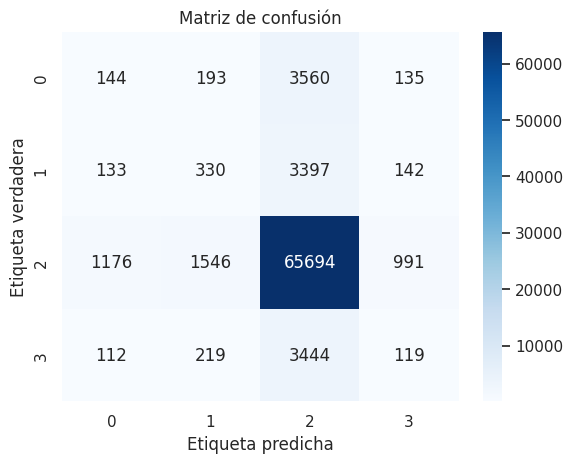

In [34]:

# Supongamos que y_true son las verdaderas etiquetas de clase y y_pred son las etiquetas predichas por el modelo
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión como un gráfico
sns.set()
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.show()

<ipython-input-275-226cdeeafbf3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-275-226cdeeafbf3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPruebaX[col] = le.fit_transform(dataPruebaX[col])
<ipython-input-275-226cdeeafbf3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

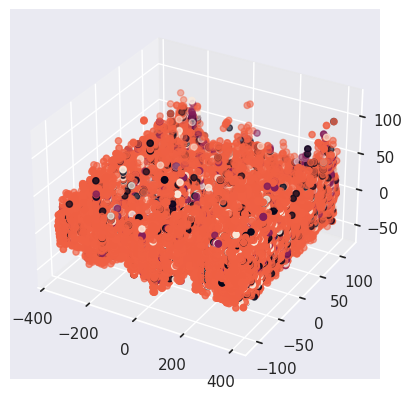

In [275]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

dataPruebaX=df[['Sex', 'Age', 'Sport', 'NOC', 'Event', 'Weight', 'Height']]
dataPruebaY= df[['Medal']]



le = LabelEncoder()

for col in dataPruebaX.columns:
    if dataPruebaX[col].dtype == 'object':
        dataPruebaX[col] = le.fit_transform(dataPruebaX[col])

for col in dataPruebaY.columns:
    if dataPruebaY[col].dtype == 'object':
        dataPruebaY[col] = le.fit_transform(dataPruebaY[col])

# Ejecutar PCA para reducir a tres dimensiones
pca = PCA(n_components=3)
X_pca = pca.fit_transform(dataPruebaX)

# Crear instancia de clasificador KNN
model = KNeighborsClassifier(n_neighbors=7, metric="manhattan")

# Entrenar modelo con datos proyectados en 3D
model.fit(X_pca, dataPruebaY)

# Graficar datos en 3D con colores según clase
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=dataPruebaY)
plt.show()